## 5.2 데이터 분석 및 전처리

### 데이터 불러오기 및 분석하기
5장에서 사용할 데이터인 쿼라 데이터를 불러온 후 탐색적 데이터 분석 과정을 진행한다.  

In [1]:
import zipfile

In [2]:
DATA_IN_PATH = './data_in/'

In [ ]:
file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [4]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
test.csv                      314.02MB
train.csv                     63.4MB


In [7]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 404290


In [8]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [9]:
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


Text(0,0.5,'Number of questions')

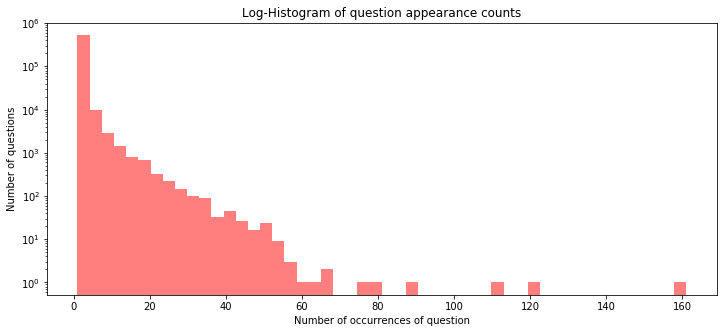

In [40]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

In [41]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x13975bfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x13971d8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13975be80>],
 'medians': [<matplotlib.lines.Line2D at 0x143264160>],
 'fliers': [<matplotlib.lines.Line2D at 0x143264978>],
 'means': [<matplotlib.lines.Line2D at 0x143264588>]}

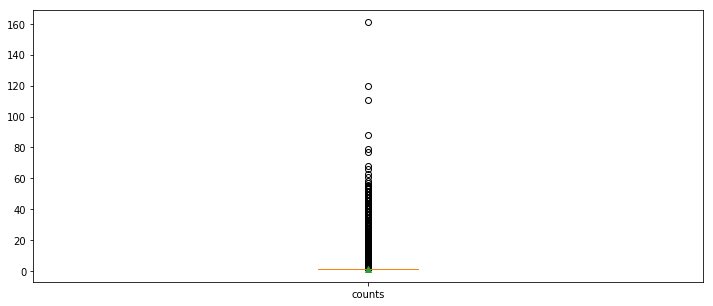

In [42]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

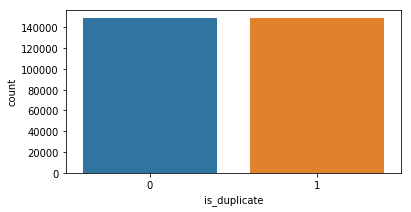

In [43]:
sentiment = train_data['is_duplicate'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['is_duplicate'])

In [44]:
train_length = train_set.apply(len)

In [45]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1433fca58>,
 'caps': [<matplotlib.lines.Line2D at 0x143406358>,
 'boxes': [<matplotlib.lines.Line2D at 0x1433fc908>],
 'medians': [<matplotlib.lines.Line2D at 0x143406ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db9c8400>],
 'means': [<matplotlib.lines.Line2D at 0x143406fd0>]}

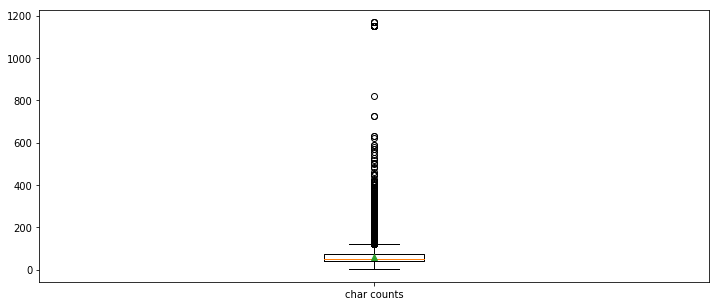

In [46]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [47]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

/Users/sinseongjin/tf110/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Prabability')

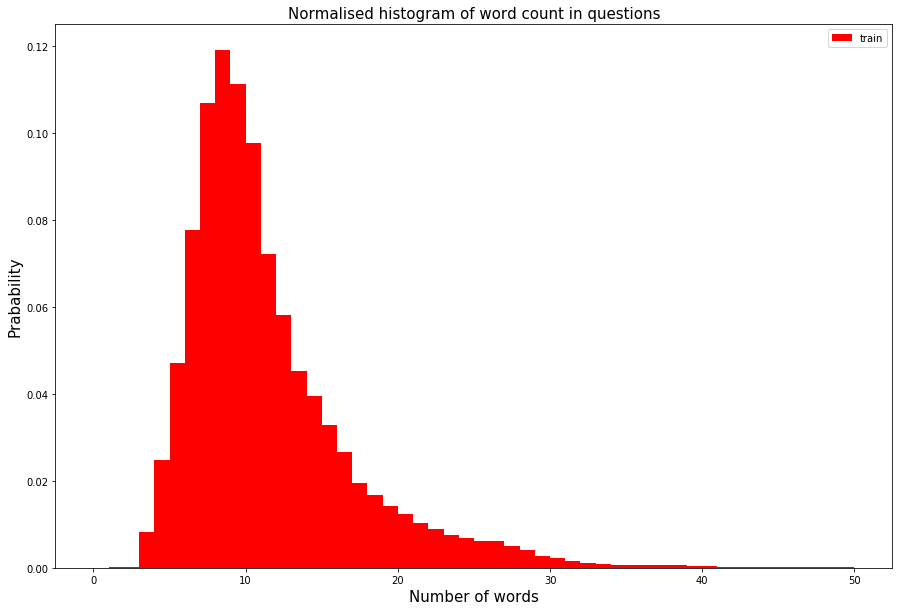

In [48]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', normed=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [49]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x15b0e67f0>,
 'caps': [<matplotlib.lines.Line2D at 0x15b0f10f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b0e66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x15b0f1940>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b0f9198>],
 'means': [<matplotlib.lines.Line2D at 0x15b0f1d68>]}

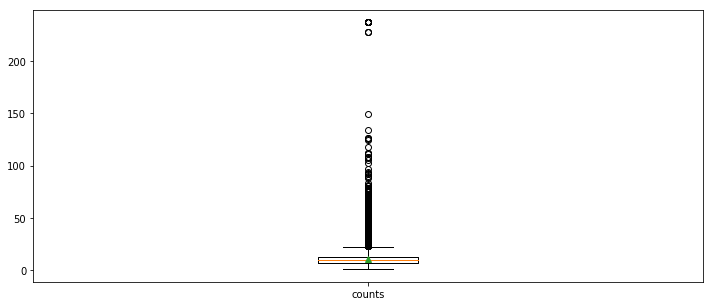

In [50]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [51]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
질문이 가득 찼을 때: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%


### 데이터 전처리

In [52]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [53]:
DATA_IN_PATH = './data_in/'
FILTERS = "([~.,!?\"':;)(])"
MAX_SEQUENCE_LENGTH = 31

In [54]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')

In [55]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data))

train_neg_data = train_neg_data.sample(frac = sample_frac)

In [56]:
print("중복 질문 개수: {}".format(len(train_pos_data)))
print("중복이 아닌 질문 개수: {}".format(len(train_neg_data)))

중복 질문 개수: 149263
중복이 아닌 질문 개수: 149263


In [57]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [58]:
change_filter = re.compile(FILTERS)

questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

for q in questions1:
     filtered_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in questions2:
     filtered_questions2.append(re.sub(change_filter, "", q).lower())

In [59]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

In [60]:
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

In [61]:
q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [62]:
word_vocab = {}
word_vocab = tokenizer.word_index 

labels = np.array(train_data['is_duplicate'], dtype=int)

print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data:{}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print("Words in index: {}".format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data:(298526, 31)
Shape of label: (298526,)
Words in index: 76509


In [63]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [64]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [65]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')

In [66]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(re.sub(change_filter, "", q).lower())

In [67]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [68]:
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data:(2345796, 31)
Shape of ids: (2345796,)


In [69]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)